## Importing all the important libraries

In [775]:
#importing all the packages
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import scipy as sp
import sys
#measure execution of code snippets-->
import timeit as t
import random
from time import time

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to show plt plots natively
%matplotlib inline 

Now we import the tables themselves, the training dataset and the testing dataset

In [776]:
train_data = pd.read_csv('C:/Users/nikhil/Desktop/Titanic Problem/train.csv')
test_data = pd.read_csv('C:/Users/nikhil/Desktop/Titanic Problem/test.csv')

train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
531,532,0,3,"Toufik, Mr. Nakli",male,NaN,0,0,2641,7.2292,NaN,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C


Filling in the empty cells in the table and extracting necessary information from the columns, like extracting the Title from the name column for every entry. (Only the title, like Mr. , Dr. etc. may be important to us, not the names themselves)

In [777]:
#FILLING IN EMPTY INFO
train_data.Cabin.fillna('N' , inplace=True)
train_data.Age.fillna(train_data.Age.median() , inplace=True)
train_data.Embarked.fillna(train_data.Embarked.mode()[0] , inplace=True)
print(train_data.isnull().sum())
print("-"*10)
#MAKING DATA MORE READABLE
train_data['Cabin'] = train_data.Cabin.apply(lambda x: str(x)[0])
train_data['Name'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
for field in ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' , 'Cabin' , 'Name']:
    print(field , " : " , train_data[field].unique())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
----------
Pclass  :  [3 1 2]
Sex  :  ['male' 'female']
SibSp  :  [1 0 3 4 2 5 8]
Parch  :  [0 1 2 5 3 4 6]
Embarked  :  ['S' 'C' 'Q']
Cabin  :  ['N' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Name  :  ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [778]:
train_data.drop(['Ticket'],axis=1 , inplace = True) #dropping the Ticket column, for it does not hold importance

In [779]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
272,273,1,2,Mrs,female,41.0,0,1,19.5000,N,S
630,631,1,1,Mr,male,80.0,0,0,30.0000,A,S
876,877,0,3,Mr,male,20.0,0,0,9.8458,N,S
18,19,0,3,Mrs,female,31.0,1,0,18.0000,N,S
13,14,0,3,Mr,male,39.0,1,5,31.2750,N,S
688,689,0,3,Mr,male,18.0,0,0,7.7958,N,S
129,130,0,3,Mr,male,45.0,0,0,6.9750,N,S
292,293,0,2,Mr,male,36.0,0,0,12.8750,D,C
686,687,0,3,Mr,male,14.0,4,1,39.6875,N,S
855,856,1,3,Mrs,female,18.0,0,1,9.3500,N,S


## Cleaning process with Test Data

In [780]:
#FILLING IN EMPTY INFO
test_data.Cabin.fillna('N' , inplace=True)
test_data.Age.fillna(train_data.Age.median() , inplace=True)
test_data.Fare.fillna(train_data.Fare.median() , inplace=True)
test_data.Embarked.fillna(train_data.Embarked.mode()[0] , inplace=True)
print(test_data.isnull().sum())

#MAKING DATA MORE READABLE
test_data['Cabin'] = test_data.Cabin.apply(lambda x: str(x)[0])
test_data['Name'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
for field in ['Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' , 'Cabin' , 'Name']:
    print(field , " : " , test_data[field].unique())
    
test_data.drop(['Ticket'],axis=1 , inplace = True)
test_data.sample(5)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Pclass  :  [3 2 1]
Sex  :  ['male' 'female']
SibSp  :  [0 1 2 3 4 5 8]
Parch  :  [0 1 3 2 4 6 5 9]
Embarked  :  ['Q' 'S' 'C']
Cabin  :  ['N' 'B' 'E' 'A' 'C' 'D' 'F' 'G']
Name  :  ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
185,1077,2,Mr,male,40.0,0,0,16.0000,N,S
361,1253,2,Mrs,female,24.0,1,1,37.0042,N,C
265,1157,3,Mr,male,28.0,0,0,7.8958,N,S
216,1108,3,Miss,female,28.0,0,0,7.8792,N,Q
333,1225,3,Mrs,female,19.0,1,1,15.7417,N,C


Assigning numbers to every unique string inside our records

In [781]:
from sklearn import preprocessing
def normalize_features(df_train , df_test):
    features = ['Sex' , 'Embarked' , 'Cabin' , 'Name']
    df_combined = pd.concat([df_train[features] , df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])

        
    return df_train, df_test

In [782]:
train_data , test_data = normalize_features(train_data , test_data)

In [783]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
128,129,1,3,9,0,28.0,1,1,22.3583,5,0
257,258,1,1,9,0,30.0,0,0,86.5000,1,2
662,663,0,1,12,1,47.0,0,0,25.5875,4,2
186,187,1,3,13,0,28.0,1,0,15.5000,7,1
226,227,1,2,12,1,19.0,0,0,10.5000,7,2
471,472,0,3,12,1,38.0,0,0,8.6625,7,2
351,352,0,1,12,1,28.0,0,0,35.0000,2,2
298,299,1,1,12,1,28.0,0,0,30.5000,2,2
182,183,0,3,8,1,9.0,4,2,31.3875,7,2
391,392,1,3,12,1,21.0,0,0,7.7958,7,2


In [784]:
#from sklearn.preprocessing import StandardScaler
#for field in train_data.drop(['Survived'] , axis=1):
#    train_data[field] = StandardScaler().fit_transform(train_data[field].values.reshape(-1, 1))

In [785]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
221,222,0,2,12,1,27.0,0,0,13.0000,7,2
258,259,1,1,9,0,35.0,0,0,512.3292,7,0
154,155,0,3,12,1,28.0,0,0,7.3125,7,2
56,57,1,2,9,0,21.0,0,0,10.5000,7,2
185,186,0,1,12,1,28.0,0,0,50.0000,0,2
442,443,0,3,12,1,25.0,1,0,7.7750,7,2
494,495,0,3,12,1,21.0,0,0,8.0500,7,2
95,96,0,3,12,1,28.0,0,0,8.0500,7,2
458,459,1,2,9,0,50.0,0,0,10.5000,7,2
827,828,1,2,8,1,1.0,0,2,37.0042,7,0


In [786]:
#for field in test_data:
#    test_data[field] = StandardScaler().fit_transform(test_data[field].values.reshape(-1, 1))

#test_data.sample(5)

In [787]:
y = train_data['Survived']
x = train_data.drop(['Survived' , 'PassengerId'] , axis=1)
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [788]:
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [789]:
clf = RandomForestClassifier(n_estimators = 500)
clf.fit(x_train , y_train)
score = clf.score(x_test , y_test)
print(score)

0.826815642458


In [790]:
test_data_dummy = pd.read_csv('C:/Users/nikhil/Desktop/Titanic Problem/test.csv')
ids = test_data_dummy['PassengerId']
predictions = clf.predict(test_data.drop(['PassengerId'] , axis=1))

output = pd.DataFrame({'PassengerId':ids , 'Survived':predictions})
output.to_csv('C:/Users/nikhil/Desktop/Titanic Problem/titanic_results.csv' , index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [791]:
i = 0
for field in train_data.drop(['PassengerId' , 'Survived'] , axis=1):
    print(field , ' : ' , end = '')
    print(clf.feature_importances_[i] , '\n')
    i+=1

Pclass  : 0.0732728126219 

Name  : 0.115161375964 

Sex  : 0.202034662431 

Age  : 0.207275945251 

SibSp  : 0.051504618727 

Parch  : 0.0316659671504 

Fare  : 0.225388671299 

Cabin  : 0.0617574349465 

Embarked  : 0.0319385116097 



In [792]:
features = pd.DataFrame()
features['Features'] = train_data.drop(['PassengerId' , 'Survived'] , axis=1).columns
features['Importance'] = clf.feature_importances_

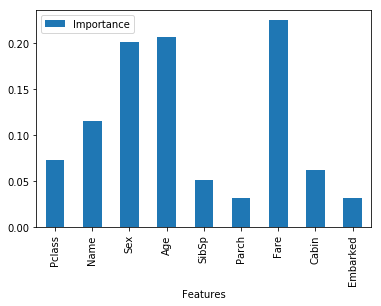

In [793]:
features.plot(x = 'Features' , y = 'Importance' , kind = 'bar')

In [794]:
y = train_data['Survived']
x = train_data[['Fare' , 'Age' , 'Sex' , 'Name']]
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators = 500)
clf.fit(x_train , y_train)
score = clf.score(x_test , y_test)
print(score)

0.787709497207
